# SentencePiece 사용하기

네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하려고 한다.

그 전에 문장 데이터를 직접 토큰화하며 어떤 방법이 가장 적합한 단어 조각을 만들어 내는지 연습을 해보자.

## 1. 데이터 가져오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import konlpy

from konlpy.tag import Mecab

mecab = Mecab()

내려받은 데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터이다.

사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분

In [2]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


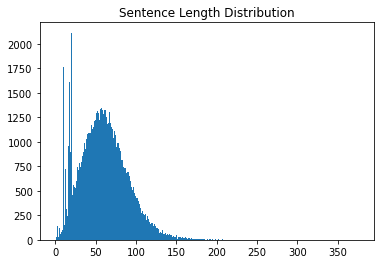

In [3]:


min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [4]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [5]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [6]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

중복된 문장이 많기 때문에 중복을 제거한 후 다시 실행시켜 본다.

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


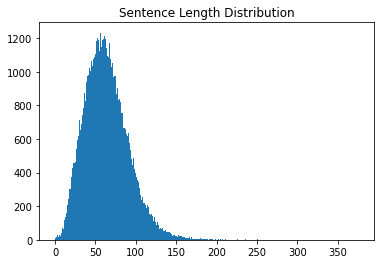

In [7]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

데이터의 개수도 17000개 가량 줄어 77591개가 된 것을 볼 수 있다.

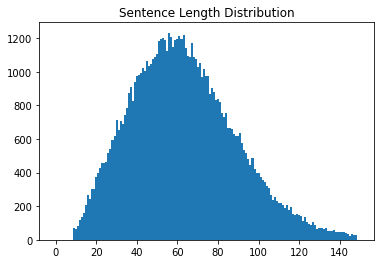

In [8]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

짧은 데이터는 노이즈로 작용할 수 있기 때문에 길이가 10미만인 데이터도 제거한다.

## 2. 공백 기반 토큰화


정제된 데이털를 기반으로 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻고 단어 사전의 크기를 확인해본다.

In [9]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [10]:
split_corpus = []


for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [11]:
# 단어 사전의 길이

split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [12]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


## 3. 형태소 기반 토큰화

MeCab 기반으로 생성된 단어 사전과 Tensor 데이터를 가져온다.

In [13]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [14]:
# 단어 사전의 길이 확인

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


공백 기반 단어 사전에 비해 단어 수가 현저히 줄어든 것을 확인할 수 있다.

이는 곧 연산량의 감소로 이어져 더 빠른 학습을 가능케 하고, 심지어 모델이 튜닝해야 하는 매개변수(Parameter) 수가 줄어들어 학습도 더 잘 된다.

## 4. SentencePiece 가져오기

In [15]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [16]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 May 25 02:49 korean_spm.model
-rw-r--r-- 1 root root 146213 May 25 02:49 korean_spm.vocab


In [17]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## 5. Tokenizer 함수 작성

 훈련시킨 SentencePiece를 활용하여 위 함수와 유사한 기능을 하는 sp_tokenize() 함수를 정의

In [18]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [19]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


## 6. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

* 네이버 영화리뷰 감정분석 태스크을 사용하여 한국어로 된 코퍼스를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전저치래서 RNN 모델을 분류기로 사용한다.

* 만약 이 문제에서 tokenizer를 sentencepiece로 바꿔 다시 풀어본다면 성능이 좋아질지 비교.

    * 네이버 영화리뷰 감정분석 코퍼스에 sentencepiece를 적용시킨 모델 학습하기

    * 학습된 모델로 sp_tokenize() 메소드 구현하기

    * 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정분석 모델을 재학습하기

    * KONLPy 형태소 분석기를 사용한 모델과 성능 비교하기
     
    * SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### 1. 데이터 가져오기

In [20]:
import urllib.request
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fc91cdf26a0>)

In [22]:
naver_df = pd.read_table('ratings.txt')
naver_df.tail()

,id,document,label
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0
199999,8548411,포풍저그가나가신다영차영차영차,0


In [24]:
# 데이터 분할

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(naver_df, test_size=0.25, random_state=0)

print('train 데이터 사이즈:', len(train_data))
print('test 데이터 사이즈:', len(test_data))

train 데이터 사이즈: 150000
test 데이터 사이즈: 50000


20만개의 데이터가 있다.

In [25]:
# 중복 및 결측치 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
train_data = train_data.dropna(how = 'any') 
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data = test_data.dropna(how = 'any') 

print('train 데이터 사이즈:', len(train_data))
print('test 데이터 사이즈:', len(test_data))

train 데이터 사이즈: 146269
test 데이터 사이즈: 49103


In [26]:
data = list(train_data['document']) + list(test_data['document'])

print("Data Size:", len(data))

Data Size: 195372


### 2. 데이터 분석 및 전처리

In [27]:
naver_review = data

문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 35


/tmp/ipykernel_1625/1743548021.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


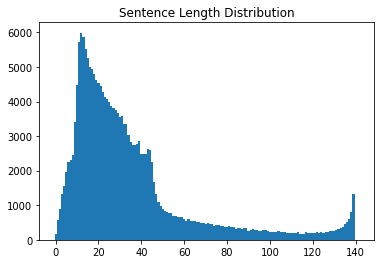

In [29]:
min_len = 999
max_len = 0
sum_len = 0

for sen in naver_review:
    length = len(sen)
    if min_len > length: 
        min_len = length
        
    if max_len < length: 
        max_len = length
    
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(naver_review))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in naver_review:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [30]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return 

check_sentence_with_length(naver_review, 135)

전쟁과 죽음을 통해 자신들만의 방식으로 이별을 채득하고 배워가는 아이들.. 우리가 순수라고 말하는 아이들의 천진함의 섬짓한 이면을 보여주는 것 같기도 하고... 암튼 기억에 남을 영화다. 헌데 왜 난 자꾸 천공의 성 라퓨타가 떠오르는걸까..?
심사하는 사람이 혐오음식도 아닌데 육회도 못먹는 사람이 하고,간장에 먹는 비빔밥에 고추장을 달라고 하고,기본적인 예의도 없이 음식한 사람 깎아내리기에 여념이 없는 프로가 참 꼴불견,일단 맛있게먹고 이런건 좋았고 어떤건 아쉬웠다 모자랐다 하는거
제발 각본쓸때 개연성 있게 좀 써라. 직원이란 이유로 기타 뺏기고 사기공범으로 몰겠단 말에 신고도 못하는게 말이나 되냐? 디테일에서 놓치고 가니 주인공이 답답하게만 느껴지고 전혀 몰입이 안되더라. 최소한도인데 그걸 못하나.. 답답하네 정말;;
이루어 질수 없기에 더욱 너무나 애절하고 안타까운 야하기만 한게 아니라 너무나 아름다운 영상. 그리고 소녀를 사랑하는 마음을 이룰 수 없는 중국인 청년의 안타깝고 애절한 눈빛. 소녀와 여인의 경계에 있는 제인마치도 너무나 묘하게 잘 어울린다.
생각보다 재밌는데 왜 평점이 낮은지 이해가 안된다. 박하선의 연기가 일품이고....특히 여고생연기, 음치흉내내는것 등등 박하선의 매력에 푹~ 빠지게 만드는 그런 영화다....요즘 유머코드와 안맞아서 흥행실패한지는 모르겠지만....암튼 재밌음.
가수들도 좋고 좋은 노래도 들을 수 있어서 좋지만전현무의 과도한 진행 욕심이 너무 보기 싫다.결과발표할때마다 채널돌려버린다.결과가 중요한가?가수와 모창 능력자 모두함께한 자리라서 승부보단 의미에 무게를 두는마당에고작 결과발표하는거로 욕먹고싶냐
고등학교때 보고 지금에서 생각난 영화 참~그땐 눈물 콧물 흘리면서 봤는데짐 보면 나올라나.. 하긴 세월이 많이 흘렀지 아마 짐 시대하곤 스토리자체가 뻔하니깐 하지만 지금도 잊혀지지않는장면은 주인공이 공부하는장면과하늘도 갈라놓지 못한 그들의사랑
별로. 이 영화가 별로라고 생각한사람들은 대개가 가볍고 재미있는 재난영화를 기대하고 봤

문장 길이 10 이하의 문장을 확인해보자.

In [31]:
check_sentence_with_length(naver_review, 10)

존 카펜터다운 B급
14화 쩔었다죠 ㄷ
도대체 뭘 만든거냐
내가첫번ㅁ째다이힝ㅋ
거참 말이 안 나옴
아주 썩어빠진 영화
지루하고 진부하다.
최고최고최고최고최고
의미없는 허리돌림.
재밌을것같아요~^^
감동의 물결....
진짜 너무하네 ㅋㅋ
..... 할말없음
말이필요업지....
졸작은 이유가 있다
10점만점에 10점
가장 일본적인 영화
진짜 재밌었다.ㅋㅋ
내 취향이 아니구나
이시대 최고의 명작
역시 명화였습니다.
감동그자체감동그자체
평점이 너무 낮네요
관전포인트는 무엇?
당혹 스러운 영화군
이게왜,, 100점
이영화 국이 였어요
이거 넘 조으다 ♥
아뭐뭐뭐어쩌라고뭐뭐
이게뭔가요내용도없고
멋있는 영화입니다.
정말 재밌어요 헤헷
표피적 심각함은 웩
재밌게 봤습니다^^
애니의새로운 개척점
쓰레기열자이상작성.
감독이센스가업나ㅡㅡ
주진모진짜잘생겻다♡
재미만 있구만!!!
최악최악최악최악최악
마무리는 또 왜이래
좋아요좋아요좋아오오
기대 이상의 감동~
정말로 안타까운..
시공간이 오글거린다
아이엠옴티머스프라임
재미없고 억지스럽다
그냥저냥 Soso.
최고임 최고!!!!
꼭봐야되는인생영화다
감동적이게본영화ㅠㅠ
이것보다 샤크 봐라
최고의 코미디 영화
간만에 잘봤습니다.
後部よし、信?よし！
재밌어요ㅎ(10자)
킬링은 역시 스타뎀
ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
진리진리진리진리진리
1234567890
아이가완전좋아하네요
1점도 아깝다-_-
정말 별로.....
저는 제미있습니다.
다시보고 싶은 영화
나만재미없낰ㅋㅋㅋㅋ
마이너스는없나요??
최고의 드라마...
엔딩이 공감된다..
내가처음으로본드라마
개꿀재밋다뿌잉최고임
ㅜㅜ 스토리도최악임
산으로 가는 스토리
혐오스렇기짝이없다.
트루먼 쇼의 아류작
머저리와 OO 영화
참 재밌었던 드라마
용서와 사랑~!!!
평높으니까 내려야지
뭐래는거니 재미없다
12세 이하만 볼것
시간버릴사람은 봐라
너무 극적인 시퀀스
이 거 공포영화임.
재법재밌어요!!!!
아~시간 아까워~!
앜ㅋ！웃기덧!!!'
핵잼핵잼핵잼핵잼핵잼
진짜 재밌게 무섭다
개잼개잼개잼개잼개잼
불면증 치료 ok~

Data Size: 195372
문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 36


/tmp/ipykernel_1625/3960672073.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


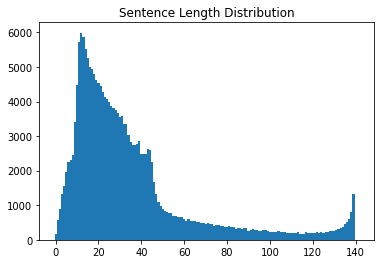

In [32]:
# 데이터에서 중복 제거하기

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(naver_review))
print("Data Size:", len(naver_review)) 

for sen in naver_review:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in naver_review:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/tmp/ipykernel_1625/588616741.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sentence_length = np.zeros((max_len), dtype=np.int)


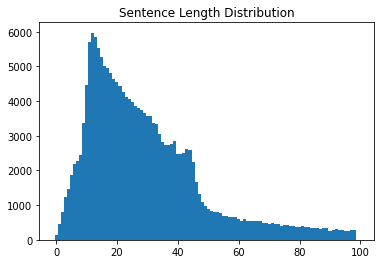

In [33]:
max_len = 100
min_len = 1

# 길이 조건에 맞는 문장만 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려보자 
# 아래 나온 그래프는 최종 데이터 분포
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()


### 3. SentencePiece 모델 학습

In [43]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in train_data['document']:
        f.write(str(row) + '\n')

# vocab size=8000, model_type=bpe
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_bpe_8k --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

In [44]:
# vocab size = 16000, model_type=bpe
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_bpe_16k --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size*2)    
)

In [45]:
# vocab size=8000, model_type=unigram
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_unigram_8k --vocab_size={}'.format(temp_file, vocab_size)    
)


In [54]:
# vocab size=16000, model_type=unigram
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=kor_spm_uingram_16k --vocab_size={}'.format(temp_file, vocab_size*2)    
)

In [55]:
!ls -l kor_spm_unigram_8k*
!ls -l kor_spm_unigram_16k*
!ls -l kor_spm_bpe_8k*
!ls -l kor_spm_bpe_16k*

-rw-r--r-- 1 root root 374763 May 25 05:05 kor_spm_unigram_8k.model
-rw-r--r-- 1 root root 144200 May 25 05:05 kor_spm_unigram_8k.vocab
ls: cannot access 'kor_spm_unigram_16k*': No such file or directory
-rw-r--r-- 1 root root 370474 May 25 05:03 kor_spm_bpe_8k.model
-rw-r--r-- 1 root root 115676 May 25 05:03 kor_spm_bpe_8k.vocab
-rw-r--r-- 1 root root 523162 May 25 05:04 kor_spm_bpe_16k.model
-rw-r--r-- 1 root root 258360 May 25 05:04 kor_spm_bpe_16k.vocab


size 16000, unigram으로 설정한 모델이 오류가 나서 제외한다.

In [56]:
def test_performance(model):
    s = spm.SentencePieceProcessor()
    s.Load(model)

    # SentencePiece를 활용한 sentence -> encoding
    tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
    print(tokensIDs)

    # SentencePiece를 활용한 sentence -> encoded pieces
    print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

    # SentencePiece를 활용한 encoding -> sentence 복원
    print(s.DecodeIds(tokensIDs))

In [58]:
print('kor_spm_unigram_8k')
test_performance(model='kor_spm_unigram_8k.model')


print('kor_spm_bpe_8k')
test_performance(model='kor_spm_bpe_8k.model')

print('kor_spm_bpe_16k')
test_performance(model='kor_spm_bpe_16k.model')

kor_spm_unigram_8k
[1440, 9, 375, 15, 1280, 9, 110, 17, 4]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.
kor_spm_bpe_8k
[4842, 889, 6558, 6306, 1391, 6302, 6402, 6296, 6294]
['▁아버', '지가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.
kor_spm_bpe_16k
[7729, 11563, 1391, 14302, 14116, 14294]
['▁아버지가', '방에', '들어', '가', '신다', '.']
아버지가방에들어가신다.


### 4. Tokenizer 함수 구현

In [59]:
def sp_tokenize(s, corpus, spm):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./{}.vocab".format(spm), 'r') as f: 
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre', maxlen=max_len)

    return tensor, word_index, index_word

In [60]:
# sp_tokenize(s, corpus) 사용 예제

s = spm.SentencePieceProcessor()
s.Load('kor_spm_unigram_8k.model') 

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus, 'kor_spm_unigram_8k')           
print(tensor)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  573 2977   14 1017
  1670    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 1526 2390  323  559

In [61]:
s = spm.SentencePieceProcessor()
s.Load('kor_spm_bpe_8k.model') 

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus, 'kor_spm_bpe_8k')           
print(tensor)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  732 2815 6319  572
   830 6294]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 1634 2405  376

In [62]:
s = spm.SentencePieceProcessor()
s.Load('kor_spm_bpe_16k.model') 

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus, 'kor_spm_bpe_16k')           
print(tensor)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   732  2815
  14319   572   830 14294]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

### 5. 모델 학습

In [63]:
tensor, word_index, index_word = sp_tokenize(s, train_data['document'], 'kor_spm_unigram_8k')

In [65]:
from sklearn.model_selection import train_test_split

filtered_label = np.array(train_data['label'])
x_train, x_val, y_train, y_val = train_test_split(tensor, filtered_label, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

print(len(x_train), len(x_test), len(x_val))
print(len(y_train), len(y_test), len(y_val))

93612 23403 29254
93612 23403 29254


In [67]:
from tensorflow import keras
from tensorflow.keras.initializers import Constant

vocab_size = vocab_size
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim,))
            
model_LSTM.add(keras.layers.LSTM(128))
model_LSTM.add(keras.layers.Dense(8, activation='relu'))  
model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          256000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense (Dense)                (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 339,473
Trainable params: 339,473
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Early Stopping과 CheckPoint 사용하여 과적합 방지

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [74]:
model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs = 20

history = model_LSTM.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    callbacks=[es, mc],
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
732/732 [==============================] - 8s 9ms/step - loss: 0.4598 - accuracy: 0.7783 - val_loss: 0.3760 - val_accuracy: 0.8325
Epoch 2/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3478 - accuracy: 0.8480 - val_loss: 0.3708 - val_accuracy: 0.8339
Epoch 3/20
732/732 [==============================] - 6s 9ms/step - loss: 0.3271 - accuracy: 0.8580 - val_loss: 0.3755 - val_accuracy: 0.8348
Epoch 4/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3037 - accuracy: 0.8693 - val_loss: 0.3731 - val_accuracy: 0.8321
Epoch 5/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2787 - accuracy: 0.8801 - val_loss: 0.3839 - val_accuracy: 0.8295
Epoch 6/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2544 - accuracy: 0.8902 - val_loss: 0.4029 - val_accuracy: 0.8250
Epoch 00006: early stopping


732/732 - 2s - loss: 0.4153 - accuracy: 0.8184
[0.41529807448387146, 0.8183566331863403]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


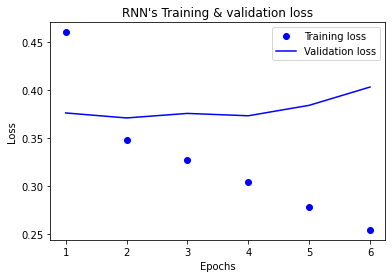

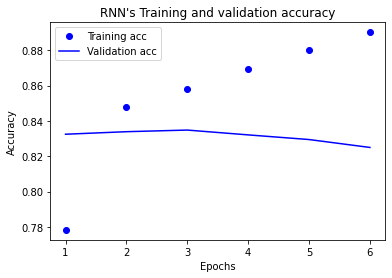

In [79]:
# 평가하기
results = model_LSTM.evaluate(x_test, y_test, verbose=2)
print(results)

history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

# train과 val의 Loss
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('RNN\'s Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# train과 val의 accuracy
plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('RNN\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [80]:
tensor, word_index, index_word = sp_tokenize(s, train_data['document'], 'kor_spm_bpe_8k')


filtered_label = np.array(train_data['label'])
x_train, x_val, y_train, y_val = train_test_split(tensor, filtered_label, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

print(len(x_train), len(x_test), len(x_val))
print(len(y_train), len(y_test), len(y_val))

vocab_size = vocab_size
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim,))
            
model_LSTM.add(keras.layers.LSTM(128))
model_LSTM.add(keras.layers.Dense(8, activation='relu'))  
model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs = 20

history = model_LSTM.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    callbacks=[es, mc],
                    validation_data=(x_val, y_val),
                    verbose=1)

93612 23403 29254
93612 23403 29254
Epoch 1/20
732/732 [==============================] - 8s 9ms/step - loss: 0.4497 - accuracy: 0.7837 - val_loss: 0.3842 - val_accuracy: 0.8258
Epoch 2/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3456 - accuracy: 0.8466 - val_loss: 0.3792 - val_accuracy: 0.8263
Epoch 3/20
732/732 [==============================] - 6s 9ms/step - loss: 0.3199 - accuracy: 0.8599 - val_loss: 0.3817 - val_accuracy: 0.8316
Epoch 4/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2894 - accuracy: 0.8731 - val_loss: 0.3862 - val_accuracy: 0.8299
Epoch 5/20
732/732 [==============================] - 6s 9ms/step - loss: 0.2584 - accuracy: 0.8866 - val_loss: 0.4032 - val_accuracy: 0.8263
Epoch 6/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2320 - accuracy: 0.8972 - val_loss: 0.4443 - val_accuracy: 0.8231
Epoch 00006: early stopping


732/732 - 2s - loss: 0.4309 - accuracy: 0.8264
[0.4309159815311432, 0.8264325261116028]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


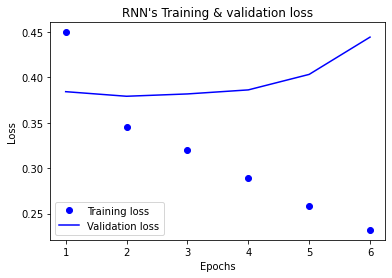

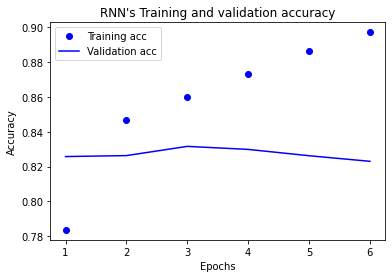

In [81]:
# 평가하기
results = model_LSTM.evaluate(x_test, y_test, verbose=2)
print(results)

history_dict = history.history
print(history_dict.keys())


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('RNN\'s Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('RNN\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [84]:
tensor, word_index, index_word = sp_tokenize(s, train_data['document'], 'kor_spm_bpe_16k')


filtered_label = np.array(train_data['label'])
x_train, x_val, y_train, y_val = train_test_split(tensor, filtered_label, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

print(len(x_train), len(x_test), len(x_val))
print(len(y_train), len(y_test), len(y_val))

vocab_size = vocab_size
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim,))
            
model_LSTM.add(keras.layers.LSTM(128))
model_LSTM.add(keras.layers.Dense(8, activation='relu'))  
model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs = 20

history = model_LSTM.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=128,
                    callbacks=[es, mc],
                    validation_data=(x_val, y_val),
                    verbose=1)

93612 23403 29254
93612 23403 29254
Epoch 1/20
732/732 [==============================] - 8s 9ms/step - loss: 0.4411 - accuracy: 0.7876 - val_loss: 0.3815 - val_accuracy: 0.8271
Epoch 2/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3451 - accuracy: 0.8482 - val_loss: 0.3811 - val_accuracy: 0.8278
Epoch 3/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3256 - accuracy: 0.8575 - val_loss: 0.3762 - val_accuracy: 0.8300
Epoch 4/20
732/732 [==============================] - 6s 8ms/step - loss: 0.3030 - accuracy: 0.8666 - val_loss: 0.3884 - val_accuracy: 0.8287
Epoch 5/20
732/732 [==============================] - 6s 9ms/step - loss: 0.2781 - accuracy: 0.8763 - val_loss: 0.3919 - val_accuracy: 0.8261
Epoch 6/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2553 - accuracy: 0.8871 - val_loss: 0.4207 - val_accuracy: 0.8234
Epoch 7/20
732/732 [==============================] - 6s 8ms/step - loss: 0.2346 - accuracy: 0.8961 - val_loss: 

732/732 - 2s - loss: 0.4332 - accuracy: 0.8262
[0.4331817328929901, 0.826176106929779]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


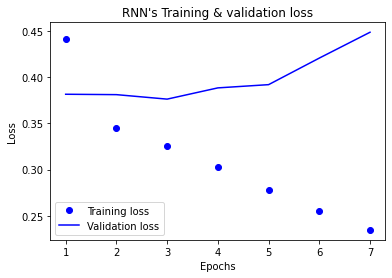

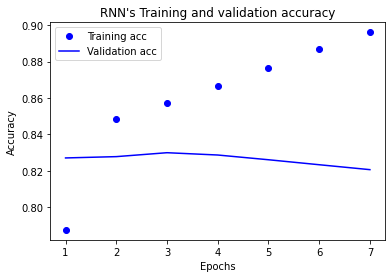

In [85]:
# 평가하기
results = model_LSTM.evaluate(x_test, y_test, verbose=2)
print(results)

history_dict = history.history
print(history_dict.keys())


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('RNN\'s Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('RNN\'s Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 6. 결론

size 16000, unigram : 0.8184


size 8000, bpe :0.8264


size 16000, bpe : 0.8262


80% 이상의 성능을 보여주었다.

## 회고

NLP반을 선택하고 시작한 첫 노드이다.

EX-8에서 한 내용을 바탕으로 했는데도 어려웠다.

딥하게 들어가서 심오하고 흥미를 유발하는 내용들이 많았지만, 에러가 나면 멘붕이 와서 하루종일 구글링만 하였다.

도움을 주신 같은 조원분들께 감사하다.